# SENTIMENT ANALISIS

## LATAR BELAKANG

#### deskripsi data
data memiliki 3 variabel yaitu variabel s.no yang merupakan variabel index dari data, variabel review yang merupakan isi review user dari aplikasi trip dan hotel dan rating yang merupakan penilaian atau peringkat yang diberikan oleh pengguna terhadap aplikasi tersebut. Ini adalah cara bagi pengguna untuk menyatakan seberapa baik atau buruk mereka menganggap aplikasi tersebut berdasarkan pengalaman mereka dalam menggunakan aplikasi tersebut.

#### permasalahan yang ingin di pecahkan
sebuah perusahaan memiliki data review dan rating dari para usersnya namun data ini terkadang tidak di analisis secara mendalam padahal data ini bisa sangat berharga untuk bahan evaluasi bagi perusahaan. pemanfaatan data bersifat text dapat di lakukan dengan teknik sentimen analisis yang merupakan pemanfaatan dari Natural Language Processing.

#### apa itu sentimen analisis?
Sentimen analisis, juga dikenal sebagai analisis sentimen atau analisis opini, adalah proses penggunaan teknik komputasional atau analisis data untuk mengevaluasi, mengidentifikasi, dan memahami sentimen atau pendapat yang terkandung dalam teks, seperti ulasan pelanggan, posting media sosial, artikel berita, atau entri blog. Tujuan utama dari sentimen analisis adalah untuk menentukan apakah teks tersebut memiliki sentimen positif, negatif, atau netral, dan dalam beberapa kasus, mengukur sejauh mana sentimen tersebut atau biasa di sebut sebagai text mining.


#### teknis
pada kali ini saya akan membuat sentimen yang ada pada kolom review yang merupan isi text dari para users untuk di nilai oleh mesin apakah review tersebut bersifat positive, negative atau netral. setelah melilhat sentimen kemudian akan di lanjutkan dengan membuat wordcloud, Word cloud adalah representasi visual dari sekumpulan kata di mana kata-kata yang paling sering muncul akan ditampilkan secara lebih besar dan lebih mencolok dibandingkan dengan kata-kata yang kurang sering muncul. Word cloud biasanya digunakan untuk menggambarkan frekuensi kata dalam sebuah teks atau data untuk memberikan gambaran visual tentang topik, tema, atau konten yang paling dominan dalam teks tersebut. wordcloud di gunakan untuk melihat kata apa saja yang sering muncul dari tiap sentimen yang telah di olah.

#### tujuan
penelitian ini bertujuan untuk :
- menilai sentimen yang terdapat pada masing-masing review.
- melakukan summery pada hasil sentiment unuk melihat hasil sentiment.
- melihat kata yang sering muncul pada masing-masing sentiment dengan wordcloud.
- menganalisis wordcloud yang sudah di buat.
- menginterpretasikan hasil analisis.

In [1]:
##pip install textblob

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
from textblob import TextBlob
import chardet

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
os.getcwd()

'C:\\Users\\bayunugrozzz\\Documents\\datasets'

## DATA CLEANING AND UNDERSTANDING

In [3]:
path = 'C:\\Users\\bayunugrozzz\\Documents\\datasets\\sentiments\\'
df = pd.read_csv(path+'hotels_sentimen.csv', encoding='latin-1')

In [4]:
df.head(10)

,S.No.,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4* experience hotel monaco seat...,3
3,4,unique \tgreat stay \twonderful time hotel mon...,5
4,5,great stay great stay \twent seahawk game awes...,5
5,6,love monaco staff husband stayed hotel crazy w...,5
6,7,cozy stay rainy city \thusband spent 7 nights ...,5
7,8,excellent staff \thousekeeping quality hotel c...,4
8,9,hotel stayed hotel monaco cruise \trooms gener...,5
9,10,excellent stayed hotel monaco past w/e delight...,5


In [5]:
df.shape

(20491, 3)

In [6]:
## cek missing value
df.isnull().sum()

S.No.     0
Review    0
Rating    0
dtype: int64

In [7]:
## cek duplicated data
df.duplicated().sum()

0

tidak terdapat data yang hilang dan data yang terduplikasi dalam datasets.

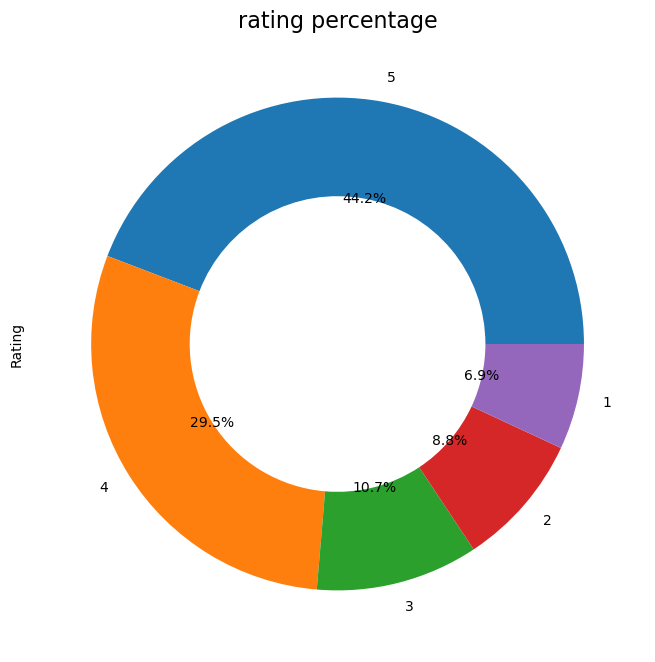

In [8]:
plt.figure(figsize=(8,8))
df['Rating'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.gca().set_aspect('equal')
plt.title('rating percentage', fontsize=16)
plt.show()

dari pie plot di atas dapat di lihat bahwa rating yang di berikan oleh users sangat baik, dimana lebih dari 65 persen users memberikan skore rating 4 dan 5 dan hanya 7 persen users memberikan rating 1 pada aplikasi.

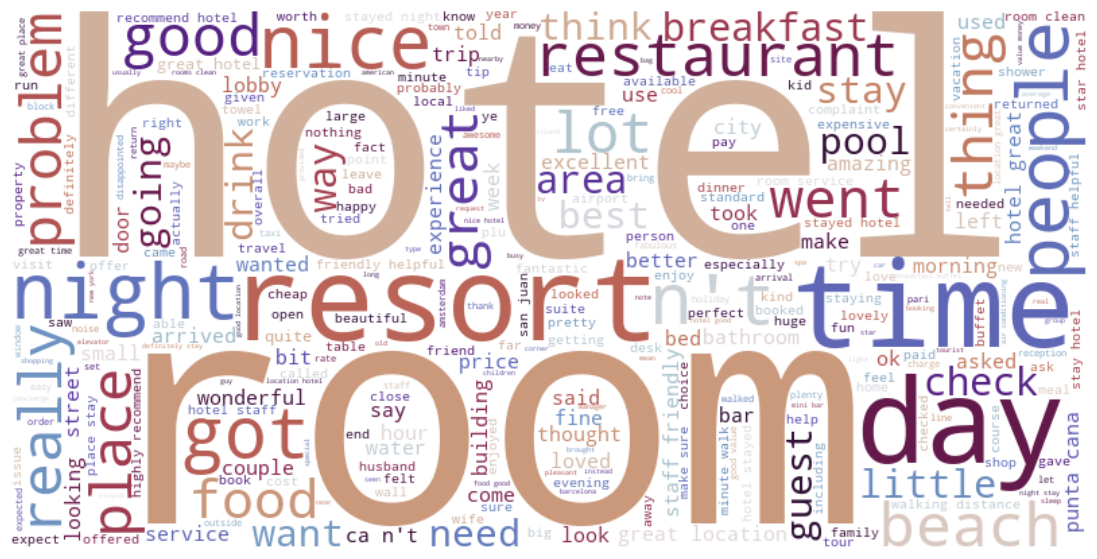

In [9]:
texs = df['Review']

teks = " ".join(review for review in df['Review'])
                
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='twilight_shifted_r',
    stopwords=None,
    max_words=300,
    contour_width=1, contour_color='black'
)

wordcloud.generate(teks)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud di atas merupakan gambaran umum dari kata-kata apa saja yang sering muncul pada kolom review.

## SENTIMEN ANALISIS

In [10]:
sentimen = df['Review']

def x(sentimen):
    blob = TextBlob(sentimen)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"
    
df['sentiment'] = df['Review'].apply(x)



In [11]:
df.sample(10)

,S.No.,Review,Rating,sentiment
2619,2620,mommy just got 5-day/4-night stay wyndham rio ...,5,positive
1297,1298,lawn mowers 5 a.m. given room golf course \two...,1,positive
10629,10630,home away home \thotel albion knows make guest...,5,positive
16910,16911,great hotel great location \tstayed jurys week...,5,positive
11084,11085,better \tstayed 5 nights hyatt regency waikiki...,2,positive
3732,3733,enjoyed wife couple stayed riu bambu feb.24 ma...,4,positive
18108,18109,pros cons pros- location good location walking...,3,positive
14282,14283,great hotel better expected really surprised c...,5,positive
4859,4860,beware hype looked hotel week staying london \...,2,positive
5250,5251,amazing experience hotel work trip say really ...,5,positive


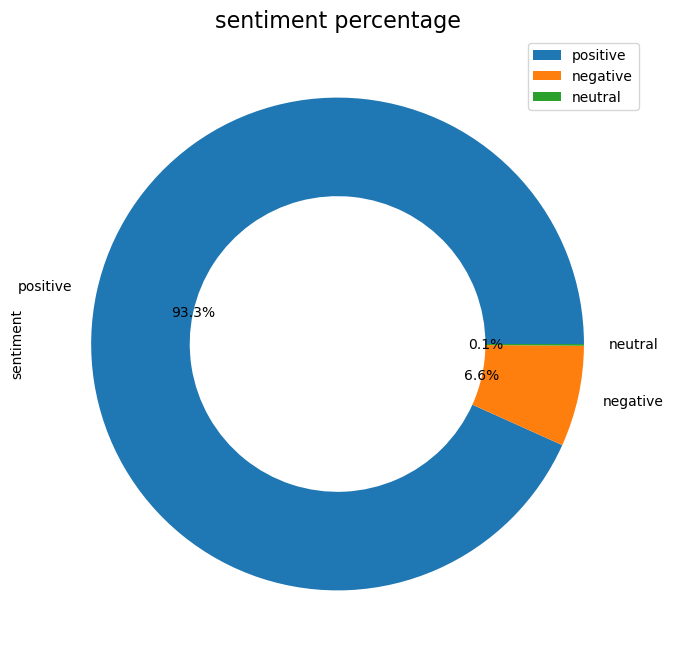

In [12]:
plt.figure(figsize=(8,8))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.gca().set_aspect('equal')
plt.title('sentiment percentage', fontsize=16)
plt.legend(df['sentiment'].unique(), loc='best')
plt.show()

setelah melakukan sentimen analisis menggunakan library textblood di dapatkan hasil sentimen dari review para users, dimana 93% user memberikan sentimen positive pada kolom review dan sisanya memberikan sentimen negative dan neutral. namun kita akan lebih fokus kepada sentimen negative sebagai bahan evaluasi perusahaan.


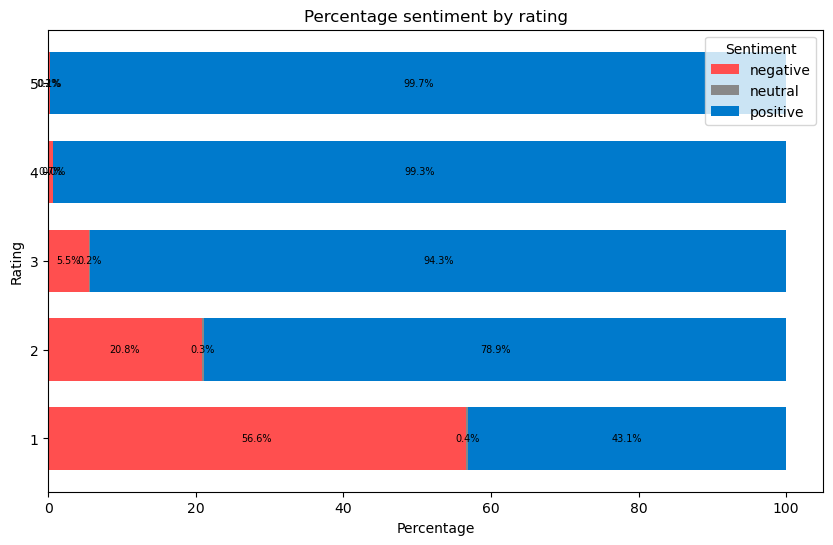

In [13]:
sentiment_counts = df.groupby(['Rating', 'sentiment']).size().unstack(fill_value=0)
sentiment_totals = sentiment_counts.sum(axis=1)
sentiment_percentages = sentiment_counts.divide(sentiment_totals, axis=0) * 100

sentiment_percentages = sentiment_percentages[['negative', 'neutral', 'positive']]

colors = {'positive': '#007acc', 'negative': '#ff4f4f', 'neutral': '#888888'}

ax = sentiment_percentages.plot(kind='barh', stacked=True, figsize=(10, 6), color=[colors[col] for col in sentiment_percentages.columns], width=0.7)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=7)

plt.title('Percentage sentiment by rating')
plt.xlabel('Percentage')
plt.ylabel('Rating')
plt.legend(title='Sentiment', loc='upper right')

plt.show()

dari histogram di atas dapat di lihat bahwa review dari users dengan rating di atas 3 memilliki tingkat sentiment negative di bawah 5 persen sedangkan review dengan rating 1 dan 2 memiliki sentiment negative yang di atas 20 persen bahkan review dengan rating 1 memiliki 50 persen lebih sentimen negative. dari barchart ini saya menyimpulkan bahwa semakin rendah reting yang di berikan users maka memiliki probabilitas yang lebih besar untuk mendapatkan sentiment negative di kolom review.

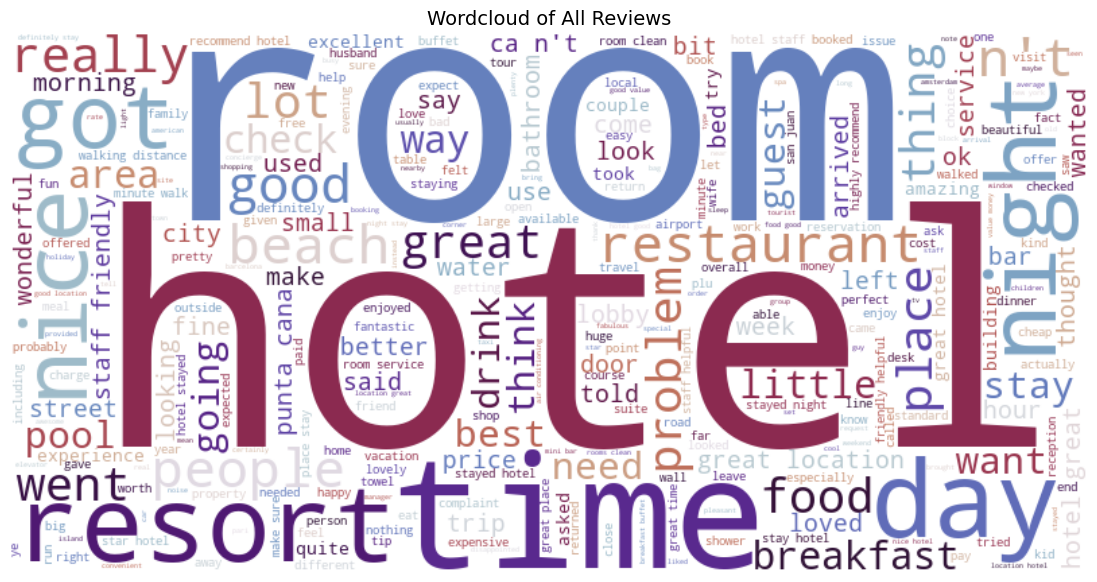

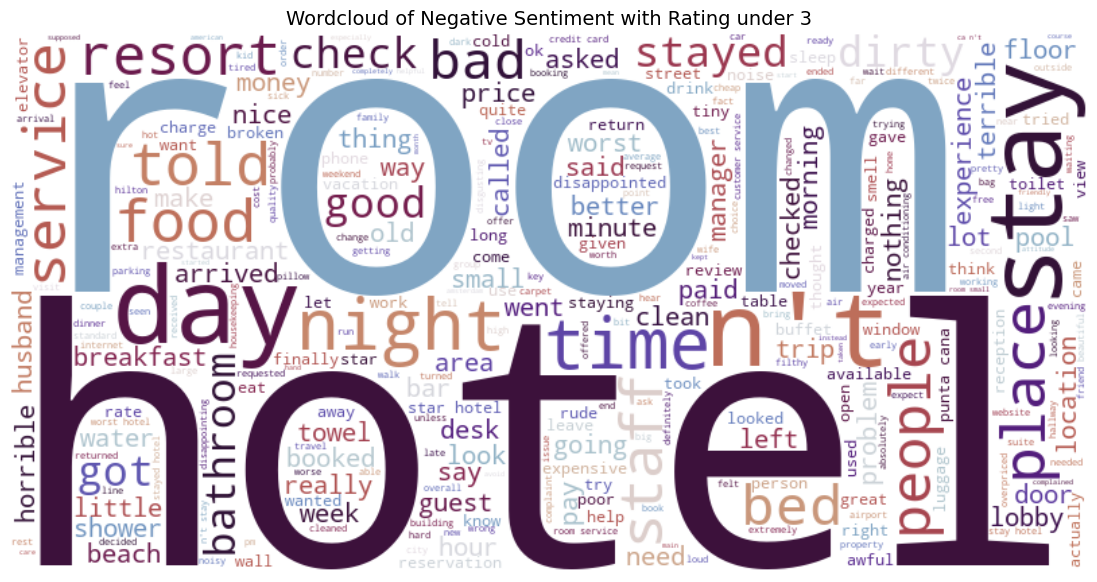

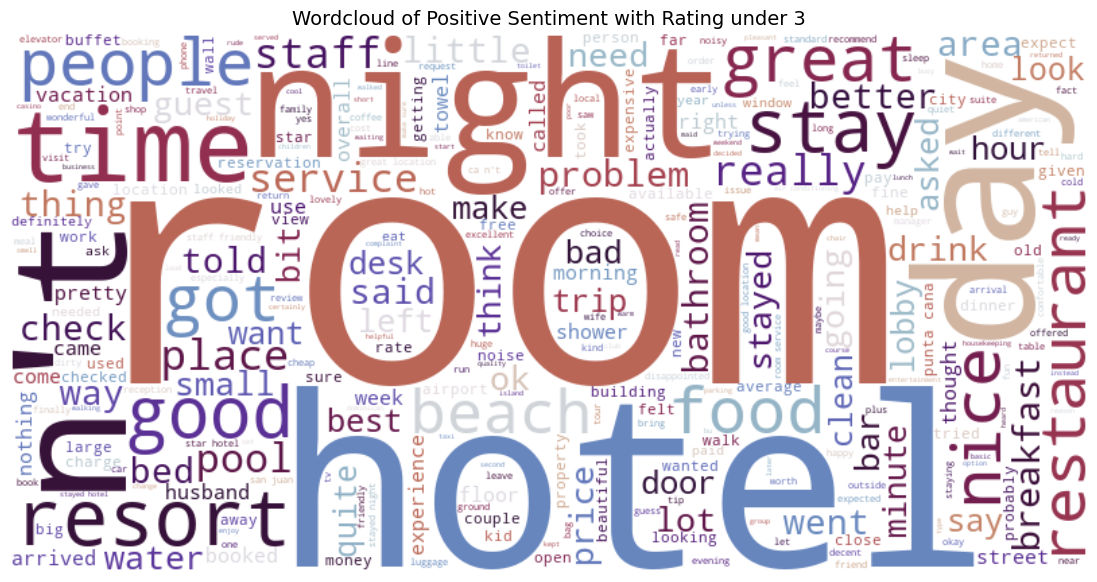

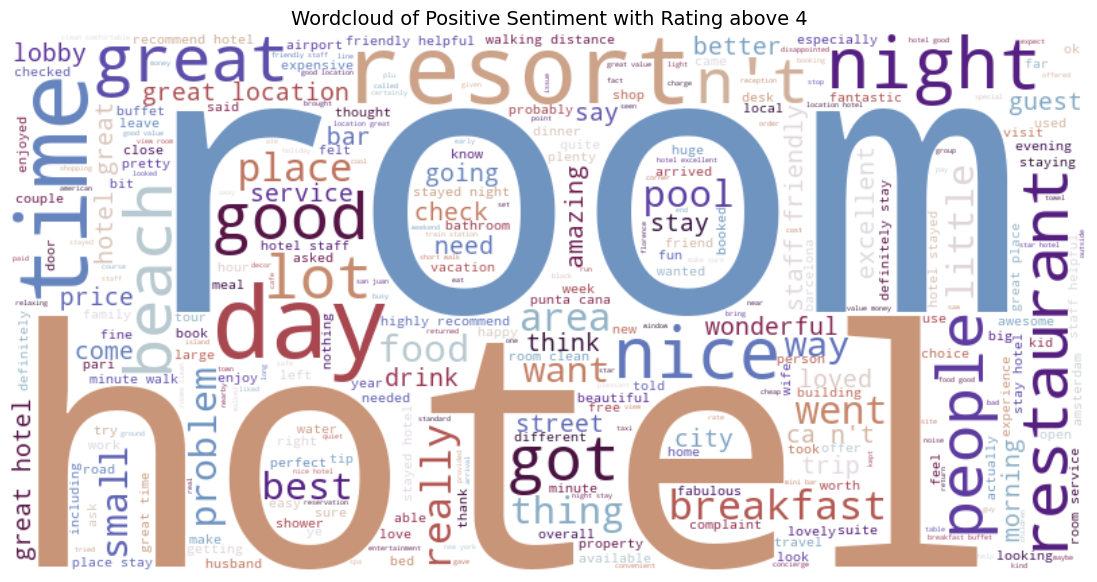

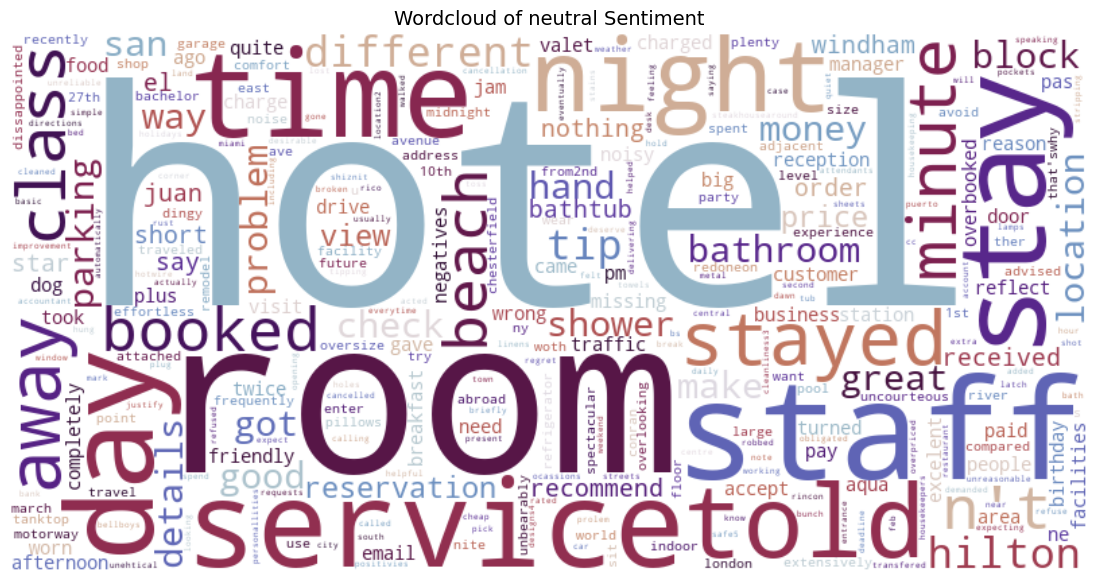

In [16]:
def generate_wordcloud(text, title, save_filename):
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap='twilight_shifted_r',
        stopwords=None,
        max_words=300,
        contour_width=1, contour_color='black'
    )

    wordcloud.generate(text)

    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    plt.show()

def create_wordclouds(df):

    all_reviews_text = " ".join(review for review in df['Review'])
    generate_wordcloud(all_reviews_text, 'Wordcloud of All Reviews', 'wordcloud_all_reviews.png')

    negative_rating_1_text = " ".join(review for review in df[(df['sentiment'] == 'negative') & (df['Rating'] <= 3)]['Review'])
    generate_wordcloud(negative_rating_1_text, 'Wordcloud of Negative Sentiment with Rating under 3', 'wordcloud_negative_sentiment_under3.png')

    positive_rating_1_text = " ".join(review for review in df[(df['sentiment'] == 'positive') & (df['Rating'] <= 3)]['Review'])
    generate_wordcloud(positive_rating_1_text, 'Wordcloud of Positive Sentiment with Rating under 3', 'wordcloud_positive_sentiment_ratingunder3.png')

    positive_rating_2_text = " ".join(review for review in df[(df['sentiment'] == 'positive') & (df['Rating'] >= 4)]['Review'])
    generate_wordcloud(positive_rating_2_text, 'Wordcloud of Positive Sentiment with Rating above 4', 'wordcloud_positive_sentiment_rating2.png')
    
    negative_rating_1_text = " ".join(review for review in df[df['sentiment'] == 'neutral']['Review'])
    generate_wordcloud(negative_rating_1_text, 'Wordcloud of neutral Sentiment', 'wordcloud_netral_sentiment.png')


create_wordclouds(df)

### INTERPRETASI

dari wordcloud yang sudah di buat dan di kombinasikan dengan hasil analisis sentimen maka saya akan berfokus kepada wordcloud dengan rating 1 dan 2 dengan sentimen negative yang dapat di gunakan sebagai bahan evaluasi.
- kita dapat fokus pada wordcloud review dengan rating 1 dan 2 serta  memiliki sentiment negative dapat di lihat bahwa ada beberapa kata yang bisa menjadi bahan evaluasi seperti hotel, room, bathroom, service, foot, restaurant, water, night, people, water dan lain-lain yang bisa jadi kata-kata ini memiliki makna pengkirtik hal-hal tersebut dan ini dapat menjadi bahan evaluasi bagi management aplikasi untuk meningkatkan pelayanan dari wordcloud tersebut.
- selain sentimen negative, kita juga dapat menganalisa wordcloud dengan rating 1 dan 2 dengan sentimen positive. melihat alasan mengapa para user memberikan review dengan sentimen positive namun memiliki rating yang rendah.

### TINDAKAN SELANJUTNYA
sebagai data analis saya akan mengkoordinasikan hasil temuan saya ini dengan stakeholder internal dan eksternal perusahaan guna melakukan evaluasi sebagai respons dari review yang telah di buat para user. hal ini tentu cukup efektif karena kita dapat melakukan pembenahan dalam hal pelayanan dan lain-lain dari feedbeck yang di berikan oleh user tanpa harus melakukan pengecekan langsung ke unit bisnis dan pemanfaatan sentimen analisis ini juga sangat efektif karena stakeholder yang bersangkutan tidak perlu pengecek satu persatu isi review yang berjumlah lebih dari 20 ribu untuk melihat review tersebut bersifat positive atau negative. sentimen analisis dapat lebih efektif dan efisiend dalam menangani hal tersebut sehingga resource yang ada dapat di manfaatkan untuk hal lain.